# Capstone Project (FINIDING A SUITABLE RESTAURANT IN BANAGLORE)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* Introduction: Business Problem
* Data
* Methodology
* Analysis
* Results and Discussion
* Conclusion

## INTRODUCTION

Bangalore is the capital of India's southern Karnataka state. It is India’s high-tech industry hence containing a large number of working people. This has increased the number of young adults who depend on restaurant for their food. Different people have different requirements when it comes to choosing a restaurant. While going to a new place knowing the restaurants in different  areas help you decide the suitable locality for an individual. 


### BUSINESS PROBLEM:
Deciding the most suitable locality with the most suitable restaurants can improve the comfort of living for a person.This project will allow customers to categorise and classify their restaurants easily.


### TARGET AUDIENCE:
This project will help the working class, tourists and families decide on the restaurants of their choice. 

In [35]:
#Importing necessary libraries
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import requests 
import folium
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

The names of restaurants along with the details of the restaurants are extracted using Foursquare API. The available ratings are also extracted.
The restaurants can be clustered according to the ratings hence allowing the customer to see areas with good restaurants. Depending on the customers requirement of the type of restaurant and cuisine they can choose the most suitable area for them.

### Source of Data:

1.Postal codes of areas in Bangalore is determined by extracting it for sites online.

2.Latitude and longitude is determined using geopy

3.Restaurants are found using Foursquare API

4.Rating of restaurants are determined using Foursquare API

In [2]:
#Getting postal code of areas in bangalore
url = "https://www.mapsofindia.com/pincode/india/karnataka/bangalore/"
req = urllib.request.urlopen(url)
article = req.read().decode()

In [3]:
soup = BeautifulSoup(article, 'html.parser')
table = soup.find('table', class_='sortable')

In [4]:
soup.find('table').find_all('tr')
soup.find('table').find_all('tr')
for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')

In [5]:
Location=[]
Pincode=[]
State=[]
District=[]
for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0):
        Location.append(cells[0].text)
        Pincode.append(cells[1].text)
        State.append(cells[2].text)
        District.append(cells[3].text.rstrip('\n'))

In [6]:
df = pd.DataFrame({"location": Location,
                           "pincode": Pincode,
                           "state": State,
                            "district": District
                  })

hence postal codes of areas are collected

In [7]:
df.head()

,location,pincode,state,district
0,Location,Pincode,State,District
1,A F station yelahanka,560063,Karnataka,Bangalore
2,Adugodi,560030,Karnataka,Bangalore
3,Agara,560034,Karnataka,Bangalore
4,Agram,560007,Karnataka,Bangalore


### Cleaning the extracted table

Removing unecessary columns 

In [8]:
df=df[1:]
df.drop(columns=(['state','district']),inplace=True)
df.head()

,location,pincode
1,A F station yelahanka,560063
2,Adugodi,560030
3,Agara,560034
4,Agram,560007
5,Air Force hospital,560007


### Getting latitude and longtitude of each area

In [9]:
address = 'Bangalore'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Banglore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Banglore are 12.9791198, 77.5912997.


In [10]:
# Getting coordinated for all areas
geolocator = Nominatim(user_agent="foursquare_agent")
d="Bangalore"
s='Karnataka'
lat=[]
lon=[]
for x in df['location']:
    add=x+","+d+","+s
    try:
        location=geolocator.geocode(add)
        latitude = location.latitude
        longitude = location.longitude
        lat.append(latitude)
        lon.append(longitude)
    except:
        lat.append('Nan')
        lon.append('Nan')

Removing areas for which latitude and longtitude couldnt be extracted.

In [11]:
# Updating coordinates to the dataset
df['latitude']=lat
df['longtitude']=lon
indexNames = df[ df['longtitude'] == 'Nan' ].index
df.drop(indexNames,inplace=True)
df.head()

,location,pincode,latitude,longtitude
2,Adugodi,560030,12.9428,77.6104
3,Agara,560034,12.6201,77.4793
5,Air Force hospital,560007,12.964,77.6275
6,Amruthahalli,560092,13.0665,77.5966
7,Anandnagar,560024,13.0334,77.5895


### Creating map of Bangalore

Creating a map of all the areas in bangalore

In [12]:
bmap=folium.Map(location=[latitude,longitude],zoom_start=10)

for lati, lng in zip(df.latitude, df.longtitude):
    folium.features.CircleMarker(
        [lati, lng],
        radius=5,
        color='brown',
        fill = True,
        fill_color='red',
        fill_opacity=0.5
    ).add_to(bmap)

bmap

## Methodology

Restaurants in bangalore along with its details are extracted. They can be divided based on their ratings avaliable by other users.

Restaurants around 8kms is identified along with details such as location, distance ,category, state etc.
This can be used for develop a better understanding of the restaurant.

Using the latitude and longtitude you can identify the distribution of different types of restaurants in an area.

## Finding restaurants in Bangalore

In [13]:
CLIENT_ID = 'EDG23JWF1NHKORFBEDPYYUSBQAXOFCGFZ4ACBYJ5ZFHGOE54'
CLIENT_SECRET = 'J1OV000RXYKPLNL0YRCVSLFD4ICZEJDLYZWPYIPI3JWBTI2Q'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EDG23JWF1NHKORFBEDPYYUSBQAXOFCGFZ4ACBYJ5ZFHGOE54
CLIENT_SECRET:J1OV000RXYKPLNL0YRCVSLFD4ICZEJDLYZWPYIPI3JWBTI2Q


In [14]:
search_query = 'restaurant'
radius = 8000
print(search_query + ' .... OK!')

restaurant .... OK!


In [15]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/search?client_id=EDG23JWF1NHKORFBEDPYYUSBQAXOFCGFZ4ACBYJ5ZFHGOE54&client_secret=J1OV000RXYKPLNL0YRCVSLFD4ICZEJDLYZWPYIPI3JWBTI2Q&ll=12.9454643,77.6805505&v=20180604&query=restaurant&radius=8000&limit=100'

In [16]:
results1 = requests.get(url1).json()

In [17]:
venues1 = results1['response']['venues']

Cleaning all the information recieved

In [18]:
bdf = json_normalize(venues1)
bdf.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,5747dc69cd1062490b28a0b2,NaN,IN,NaN,India,NaN,829,[India],"[{'label': 'display', 'lat': 12.94891548156738...",12.948915,77.687325,NaN,NaN,Diamond restaurant,v-1587639632
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,503f1587e4b074ec08137454,"#69, next to adishwars electronics, sarjapur r...",IN,Bangalore,India,sarjapur road,3474,"[#69, next to adishwars electronics, sarjapur ...","[{'label': 'display', 'lat': 12.91451582710578...",12.914516,77.676426,560035,Karnātaka,3 Olives multi cuisine restaurant,v-1587639632
2,"[{'id': '54135bf5e4b08f3d2429dfed', 'name': 'K...",False,5a4b3406c0f16320555920f7,"Chandana, Kadubeesanahalli,",IN,Bangalore,India,NaN,1315,"[Chandana, Kadubeesanahalli,, Bangalore 560103...","[{'label': 'display', 'lat': 12.939706, 'lng':...",12.939706,77.691140,560103,Karnātaka,Kidilum Kerala Restaurant,v-1587639632
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4fdb6774e4b049d37341b0a3,"3rd Cross Rd, C V Raman Nagar",IN,Bangalore,India,NaN,4496,"[3rd Cross Rd, C V Raman Nagar, Bangalore 5600...","[{'label': 'display', 'lat': 12.98525980158422...",12.985260,77.673423,560093,Karnātaka,Khwahish Cafe And Restaurant,v-1587639632
4,"[{'id': '54135bf5e4b08f3d2429dfe5', 'name': 'A...",False,59575a86d1a40251f586a07f,Near More Megastore,IN,Bangalore,India,"Outer ring road, Marathahalli",2034,"[Near More Megastore (Outer ring road, Maratha...","[{'label': 'display', 'lat': 12.94842265503902...",12.948423,77.699055,560037,Karnātaka,Nagarjuna Restaurant,v-1587639632


In [19]:
c = ['name', 'categories'] + [col for col in bdf.columns if col.startswith('location.')] + ['id']
fdf = bdf.loc[:, c]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
fdf['categories'] = fdf.apply(get_category_type, axis=1)
fdf.columns = [column.split('.')[-1] for column in fdf.columns]

fdf.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Diamond restaurant,Restaurant,NaN,IN,NaN,India,NaN,829,[India],"[{'label': 'display', 'lat': 12.94891548156738...",12.948915,77.687325,NaN,NaN,5747dc69cd1062490b28a0b2
1,3 Olives multi cuisine restaurant,Restaurant,"#69, next to adishwars electronics, sarjapur r...",IN,Bangalore,India,sarjapur road,3474,"[#69, next to adishwars electronics, sarjapur ...","[{'label': 'display', 'lat': 12.91451582710578...",12.914516,77.676426,560035,Karnātaka,503f1587e4b074ec08137454
2,Kidilum Kerala Restaurant,Kerala Restaurant,"Chandana, Kadubeesanahalli,",IN,Bangalore,India,NaN,1315,"[Chandana, Kadubeesanahalli,, Bangalore 560103...","[{'label': 'display', 'lat': 12.939706, 'lng':...",12.939706,77.691140,560103,Karnātaka,5a4b3406c0f16320555920f7
3,Khwahish Cafe And Restaurant,Indian Restaurant,"3rd Cross Rd, C V Raman Nagar",IN,Bangalore,India,NaN,4496,"[3rd Cross Rd, C V Raman Nagar, Bangalore 5600...","[{'label': 'display', 'lat': 12.98525980158422...",12.985260,77.673423,560093,Karnātaka,4fdb6774e4b049d37341b0a3
4,Nagarjuna Restaurant,Andhra Restaurant,Near More Megastore,IN,Bangalore,India,"Outer ring road, Marathahalli",2034,"[Near More Megastore (Outer ring road, Maratha...","[{'label': 'display', 'lat': 12.94842265503902...",12.948423,77.699055,560037,Karnātaka,59575a86d1a40251f586a07f


### Mapping the aquired data

Map of different restaurants in bangalore

In [20]:
bmap=folium.Map(location=[latitude,longitude],zoom_start=12)

for lati, lng in zip(fdf.lat, fdf.lng):
    folium.features.CircleMarker(
        [lati, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(bmap)

bmap

## Analysis on the data

Created an csv file by collected data using Foursquare API

In [21]:
# fdf.to_csv("merger.csv")
fdf=pd.read_csv('merger.csv')

In [33]:
fdf.head()

,Unnamed: 0,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,state,rating
0,0,NaN,Restaurant,IN,Bangalore,India,NaN,6063,"['Bangalore 560034', 'Karnātaka', 'India']",4f805509e4b0c2f7654da749,"[{'label': 'display', 'lat': 12.92891656764973...",12.928917,77.627307,12th Main Restaurant,560034,Karnātaka,6.1
1,1,"#69, next to adishwars electronics, sarjapur r...",Restaurant,IN,Bangalore,India,sarjapur road,3474,"['#69, next to adishwars electronics, sarjapur...",503f1587e4b074ec08137454,"[{'label': 'display', 'lat': 12.91451582710578...",12.914516,77.676426,3 Olives multi cuisine restaurant,560035,Karnātaka,Nan
2,2,NaN,Indian Restaurant,IN,NaN,India,NaN,2400,['India'],4ea7b945e3003a42bcaf511a,"[{'label': 'display', 'lat': 12.92485279961673...",12.924853,77.674055,Aangan Restaurant @ Bellandur,NaN,NaN,Nan
3,3,149 Infantry Road,NaN,IN,Bangalore 560 001,India,NaN,586,"['149 Infantry Road', 'Bangalore 560 001', 'Ka...",4d64ff3c6ccdba7a26b09dc3,"[{'label': 'display', 'lat': 12.98395633333333...",12.983956,77.593435,Aathithya Restaurant,NaN,Karnataka State,Nan
4,4,Racecourse road,Indian Restaurant,IN,Bangalore,India,NaN,720,"['Racecourse road', 'Bangalore', 'Karnātaka', ...",4b6bd124f964a52079192ce3,"[{'label': 'display', 'lat': 12.98443130720690...",12.984431,77.587500,Alampur Restaurant,NaN,Karnātaka,Nan


## Analysis

From the collected dataset, we can analysis the data to develop a better understanding of the information.
We can perorm analysis by visulaizing through graphs and various other plotting methods.

Counting the number of different types of restaurants.

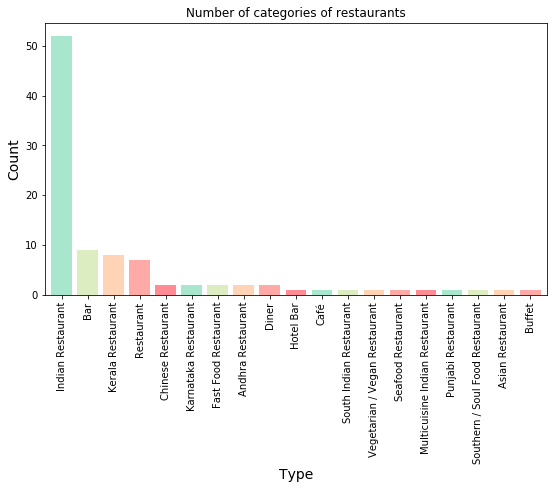

In [23]:
fdf['categories'].value_counts().plot(
    kind='bar',color=['#a8e6ce','#dcedc2','#ffd3b5','#ffaaa6','#ff8c94'],
    figsize=(9,5),width=0.8)
plt.title("Number of categories of restaurants")
plt.xlabel("Type", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

Distrbution of restaurants based on its distance from the coordinates of bangalore

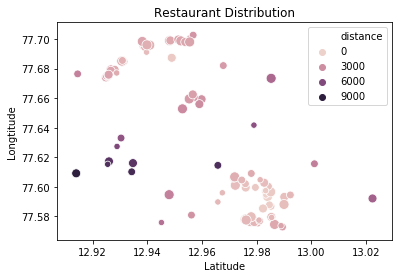

In [36]:
sns.scatterplot(x="lat", y="lng",
                hue='distance',s=[40,60,80,100],
                     data=fdf)
plt.xlabel("Latitude")
plt.ylabel("Longtitude")
plt.title("Restaurant Distribution")
plt.show()

## Extracting Ratings

In [25]:
ids=fdf.id[0:50]
rate=[]
for i in ids:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    result['response']['venue']
    try:
        print(result['response']['venue']['rating'])
        rate.append(result['response']['venue']['rating'])
    except:
        print('This venue has not been rated yet.')
        rate.append('Nan')

6.1
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
8.0
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
7.4
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
5.7
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This

Adding the ratings to the dataset

In [31]:
fdf['rating']=rate

In [32]:
fdf.head()

,Unnamed: 0,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,state,rating
0,0,NaN,Restaurant,IN,Bangalore,India,NaN,6063,"['Bangalore 560034', 'Karnātaka', 'India']",4f805509e4b0c2f7654da749,"[{'label': 'display', 'lat': 12.92891656764973...",12.928917,77.627307,12th Main Restaurant,560034,Karnātaka,6.1
1,1,"#69, next to adishwars electronics, sarjapur r...",Restaurant,IN,Bangalore,India,sarjapur road,3474,"['#69, next to adishwars electronics, sarjapur...",503f1587e4b074ec08137454,"[{'label': 'display', 'lat': 12.91451582710578...",12.914516,77.676426,3 Olives multi cuisine restaurant,560035,Karnātaka,Nan
2,2,NaN,Indian Restaurant,IN,NaN,India,NaN,2400,['India'],4ea7b945e3003a42bcaf511a,"[{'label': 'display', 'lat': 12.92485279961673...",12.924853,77.674055,Aangan Restaurant @ Bellandur,NaN,NaN,Nan
3,3,149 Infantry Road,NaN,IN,Bangalore 560 001,India,NaN,586,"['149 Infantry Road', 'Bangalore 560 001', 'Ka...",4d64ff3c6ccdba7a26b09dc3,"[{'label': 'display', 'lat': 12.98395633333333...",12.983956,77.593435,Aathithya Restaurant,NaN,Karnataka State,Nan
4,4,Racecourse road,Indian Restaurant,IN,Bangalore,India,NaN,720,"['Racecourse road', 'Bangalore', 'Karnātaka', ...",4b6bd124f964a52079192ce3,"[{'label': 'display', 'lat': 12.98443130720690...",12.984431,77.587500,Alampur Restaurant,NaN,Karnātaka,Nan


### Cleaning the data by removing Nan values

In [137]:
fdr=fdf[fdf.rating!='Nan']
fdr.head()

,Unnamed: 0,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,state,rating
0,0,NaN,Restaurant,IN,Bangalore,India,NaN,6063,"['Bangalore 560034', 'Karnātaka', 'India']",4f805509e4b0c2f7654da749,"[{'label': 'display', 'lat': 12.92891656764973...",12.928917,77.627307,12th Main Restaurant,560034,Karnātaka,6.1
16,16,"477, Krishna Temple Rd",Karnataka Restaurant,IN,Bangalore,India,"1st Stage, Indiranagar",5624,"['477, Krishna Temple Rd (1st Stage, Indiranag...",4c792ffcdf08a1cd98b4d95d,"[{'label': 'display', 'lat': 12.97895839673881...",12.978958,77.641735,Coorg - The Restaurant,NaN,Karnātaka,8
20,20,"Next to Hindu Office, Off Infantry Road",Indian Restaurant,IN,Bangalore,India,NaN,937,"['Next to Hindu Office, Off Infantry Road', 'B...",4b9da64ef964a5202db836e3,"[{'label': 'display', 'lat': 12.98345552406055...",12.983456,77.598707,Eden Park Restaurant,560052.0,Karnātaka,7.4
24,24,"#42/5, Opp. Shivajinagar Bus Stand",Indian Restaurant,IN,Bangalore,India,Central Street,1343,"['#42/5, Opp. Shivajinagar Bus Stand (Central ...",4b7bd6aaf964a52017702fe3,"[{'label': 'display', 'lat': 12.98217614738139...",12.982176,77.603279,Imperial Restaurant,560005.0,Karnātaka,5.7
38,38,"No.82 and 83,2nd Floor,Ktr Complex",Indian Restaurant,IN,Bangalore,India,"Hosur Road,Madiwala",7207,"['No.82 and 83,2nd Floor,Ktr Complex (Hosur Ro...",4cdf586d825e721e5d827045,"[{'label': 'display', 'lat': 12.92596537254023...",12.925965,77.617203,MAS Family Restaurant,560068,Karnātaka,5.2


### Created a dataset using the gathered information

Created a dataset by collecting the ratings over a period of time as their is a limit on the number of call that can be made using the API. Since the ratings are not avaliabe for all restaurants, the number of restaurants decreases.

In [4]:
df=pd.read_csv('final.csv')

Cleaning the dataset by removing unwanted columns

In [5]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
df.head()

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,rating,state
0,NaN,Restaurant,IN,Bangalore,India,NaN,6063,"['Bangalore 560034', 'Karnātaka', 'India']",4f805509e4b0c2f7654da749,"[{'label': 'display', 'lat': 12.92891656764973...",12.928917,77.627307,12th Main Restaurant,560034.0,6.1,Karnātaka
1,"477, Krishna Temple Rd",Karnataka Restaurant,IN,Bangalore,India,"1st Stage, Indiranagar",5624,"['477, Krishna Temple Rd (1st Stage, Indiranag...",4c792ffcdf08a1cd98b4d95d,"[{'label': 'display', 'lat': 12.97895839673881...",12.978958,77.641735,Coorg - The Restaurant,NaN,8.0,Karnātaka
2,"Next to Hindu Office, Off Infantry Road",Indian Restaurant,IN,Bangalore,India,NaN,937,"['Next to Hindu Office, Off Infantry Road', 'B...",4b9da64ef964a5202db836e3,"[{'label': 'display', 'lat': 12.98345552406055...",12.983456,77.598707,Eden Park Restaurant,560052.0,7.4,Karnātaka
3,"#42/5, Opp. Shivajinagar Bus Stand",Indian Restaurant,IN,Bangalore,India,Central Street,1343,"['#42/5, Opp. Shivajinagar Bus Stand (Central ...",4b7bd6aaf964a52017702fe3,"[{'label': 'display', 'lat': 12.98217614738139...",12.982176,77.603279,Imperial Restaurant,560005.0,5.7,Karnātaka
4,"No.82 and 83,2nd Floor,Ktr Complex",Indian Restaurant,IN,Bangalore,India,"Hosur Road,Madiwala",7207,"['No.82 and 83,2nd Floor,Ktr Complex (Hosur Ro...",4cdf586d825e721e5d827045,"[{'label': 'display', 'lat': 12.92596537254023...",12.925965,77.617203,MAS Family Restaurant,560068.0,5.2,Karnātaka


## Mapping the restaurants with rating

In [141]:
bmap=folium.Map(location=[latitude,longitude],zoom_start=12)

for lati, lng in zip(df.lat, df.lng):
    folium.features.CircleMarker(
        [lati, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.5,
    ).add_to(bmap)
    
bmap

## Analysis based on rating

Number of restaurants avaliable for different ratings

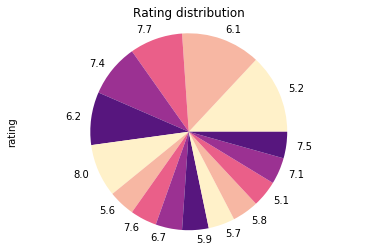

In [154]:
df.rating.value_counts().plot(kind='pie',colors=['#FFF1C9','#F7B7A3','#EA5F89','#9B3192','#57167E'])
plt.title("Rating distribution")
plt.axis('equal')
plt.show()

Distribution of cateories of restaurants based on thier ratings

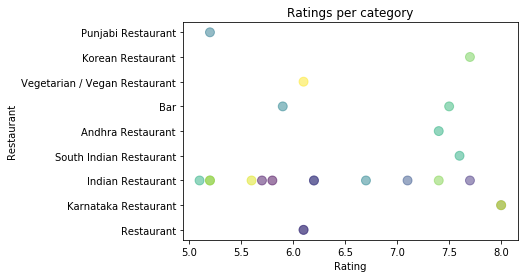

In [168]:
colors = np.random.rand(23)
area = 80 
plt.scatter(df.rating, df.categories, s=area, c=colors, alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Restaurant")
plt.title("Ratings per category")
plt.show()

Dropping columns that are not necessary for clustering

In [6]:
i=df.copy()
i.drop(columns=(['name','address','cc','city','country','crossStreet','distance','formattedAddress','labeledLatLngs','lat','lng','postalCode','state','id','categories']),inplace=True)
i.head()

,rating
0,6.1
1,8.0
2,7.4
3,5.7
4,5.2


### Clustering using K-Means Algorithm

Three clusters are going to be made and clustering is going to be performed depending on the rating of each restaurant. The result will be 3 clusters where the first cluster will be restaurants with low ratings followed by the cluster that contains restaurants with medium rating and the final cluster will be the highly rated cluster.

In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(i)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Attaining the cluster number of each restaurant

Adding the cluster numbers to the dataset

In [8]:
labels=kmeans.labels_
i['clusters'] = labels
i.head()

,rating,clusters
0,6.1,2
1,8.0,0
2,7.4,0
3,5.7,1
4,5.2,1


In [9]:
kclusters = 3
kc = i
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kc)

Merging the clustering data with the pervious information

In [10]:
km = df
km['clusters']=i['clusters']

In [11]:
km.head()

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,rating,state,clusters
0,NaN,Restaurant,IN,Bangalore,India,NaN,6063,"['Bangalore 560034', 'Karnātaka', 'India']",4f805509e4b0c2f7654da749,"[{'label': 'display', 'lat': 12.92891656764973...",12.928917,77.627307,12th Main Restaurant,560034.0,6.1,Karnātaka,2
1,"477, Krishna Temple Rd",Karnataka Restaurant,IN,Bangalore,India,"1st Stage, Indiranagar",5624,"['477, Krishna Temple Rd (1st Stage, Indiranag...",4c792ffcdf08a1cd98b4d95d,"[{'label': 'display', 'lat': 12.97895839673881...",12.978958,77.641735,Coorg - The Restaurant,NaN,8.0,Karnātaka,0
2,"Next to Hindu Office, Off Infantry Road",Indian Restaurant,IN,Bangalore,India,NaN,937,"['Next to Hindu Office, Off Infantry Road', 'B...",4b9da64ef964a5202db836e3,"[{'label': 'display', 'lat': 12.98345552406055...",12.983456,77.598707,Eden Park Restaurant,560052.0,7.4,Karnātaka,0
3,"#42/5, Opp. Shivajinagar Bus Stand",Indian Restaurant,IN,Bangalore,India,Central Street,1343,"['#42/5, Opp. Shivajinagar Bus Stand (Central ...",4b7bd6aaf964a52017702fe3,"[{'label': 'display', 'lat': 12.98217614738139...",12.982176,77.603279,Imperial Restaurant,560005.0,5.7,Karnātaka,1
4,"No.82 and 83,2nd Floor,Ktr Complex",Indian Restaurant,IN,Bangalore,India,"Hosur Road,Madiwala",7207,"['No.82 and 83,2nd Floor,Ktr Complex (Hosur Ro...",4cdf586d825e721e5d827045,"[{'label': 'display', 'lat': 12.92596537254023...",12.925965,77.617203,MAS Family Restaurant,560068.0,5.2,Karnātaka,1


Mapping the restaurants depending upon the cluster number

In [14]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, cluster in zip(km['lat'], km['lng'], km['clusters']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## Result and Conclusion

#### Cluster 0

Ratings of the cluster:

In [282]:
km[km.clusters==0].rating.value_counts()

7.7    2
7.4    2
8.0    2
7.1    1
7.6    1
7.5    1
Name: rating, dtype: int64

In [246]:
km[km.clusters==0].categories.value_counts()

Indian Restaurant          3
Karnataka Restaurant       2
Bar                        1
South Indian Restaurant    1
Andhra Restaurant          1
Korean Restaurant          1
Name: categories, dtype: int64

#### Cluster 1
Rating of the cluster:

In [244]:
km[km.clusters==1].rating.value_counts()

5.2    3
5.1    1
5.6    1
5.7    1
Name: rating, dtype: int64

Categories:

In [200]:
km[km.clusters==1].categories.value_counts()

Indian Restaurant     5
Punjabi Restaurant    1
Name: categories, dtype: int64

#### Cluster 2:

Ratings of the cluster:

In [205]:
km[km.clusters==2].rating.value_counts()

6.1    3
6.2    2
5.9    1
5.8    1
6.7    1
Name: rating, dtype: int64

Categories:

In [203]:
km[km.clusters==2].categories.value_counts()

Indian Restaurant                4
Restaurant                       2
Vegetarian / Vegan Restaurant    1
Bar                              1
Name: categories, dtype: int64

### Comparisons of the clusters

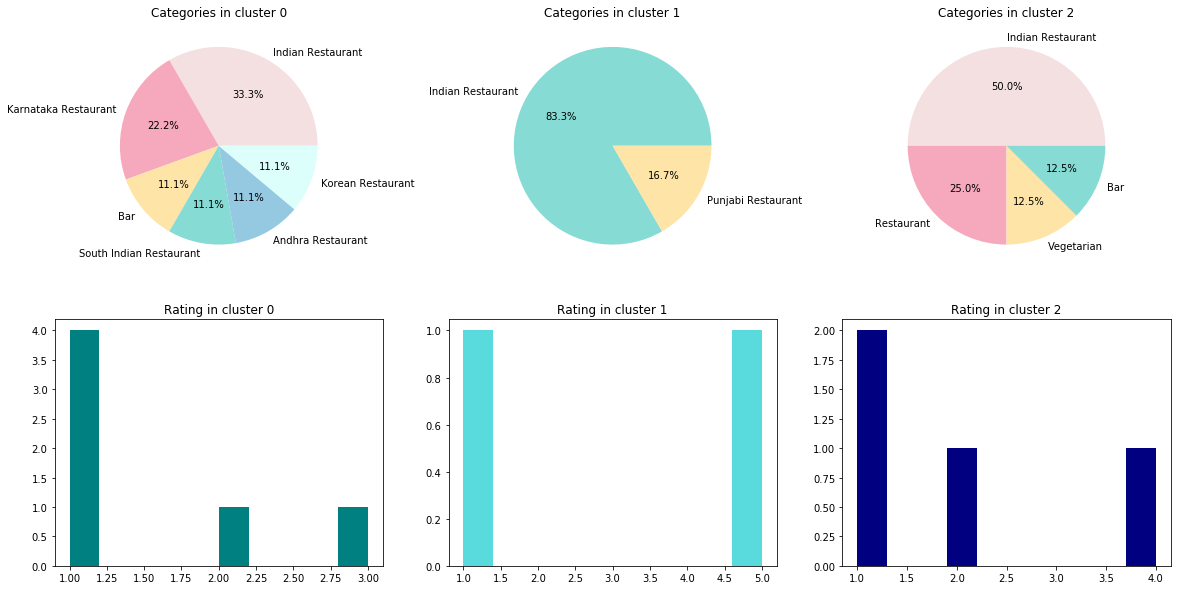

In [280]:
fig, axs = plt.subplots(2, 3,figsize=(20, 10))
axs[0, 0].pie(km[km.clusters==0].categories.value_counts(), autopct='%1.1f%%',
              labels=['Indian Restaurant','Karnataka Restaurant','Bar','South Indian Restaurant','Andhra Restaurant','Korean Restaurant']
             ,colors=['#f4e0e1','#f6a9bd','#fee4a7','#86dbd4','#95c9e2','#ddfffc'])
axs[0,0].title.set_text('Categories in cluster 0')
axs[0, 1].pie(km[km.clusters==1].categories.value_counts(), autopct='%1.1f%%',
             labels=['Indian Restaurant','Punjabi Restaurant'],colors=['#86dbd4','#fee4a7'])
axs[0,1].title.set_text('Categories in cluster 1')
axs[0, 2].pie(km[km.clusters==2].categories.value_counts(), autopct='%1.1f%%',
             labels=['Indian Restaurant','Restaurant','Vegetarian','Bar'],
             colors=['#f4e0e1','#f6a9bd','#fee4a7','#86dbd4'])
axs[0,2].title.set_text('Categories in cluster 2')

axs[1,0].hist(km[km.clusters==0].categories.value_counts(),color='#008080')
axs[1,0].title.set_text('Rating in cluster 0')
axs[1,1].hist(km[km.clusters==1].categories.value_counts(),color='#59DADC')
axs[1,1].title.set_text('Rating in cluster 1')
axs[1,2].hist(km[km.clusters==2].categories.value_counts(),color='#000080')
axs[1,2].title.set_text('Rating in cluster 2')

From the above analysis:
    
    Cluster 0: has the highest ratings with Coorg - The Restaurant with the highest rating. 
    The rating ranges from 7 to 8
    It consists of Indian restaurants as its main category(33%).
    
    Cluster 1: has the minimum ratings. 
    The rating ranges from 5 to 5.9.
    It consists of Indian restaurants as its main category(83%).
    
    Cluster 2:has the moderate ratings. 
    The rating ranges from 6 to 7.
    It consists of Indian restaurants as its main category (50%).
    
     

### Conclusion

The main purpose of this project is to determine areas in Bangalore with restaurants with good ratings.
This would be helpful for a person that is new to the city and is finding a locality with good food that is suitable for that individual. It also explain the different categories of cuisines available in the city and the ratings of those restaurants.

If an individual is searching to settle down in Bangalore and if he wants to live in locality here he would have easy access to the restaurants of his choice then this project would be able to provide them the required information.